In [1]:
import pandas as pd
import numpy as np

### Result Evaluation

Reading the input file

In [2]:
input_dataframe = pd.read_json("input/input_data_validated_cleaned_v2.json")
display(input_dataframe)

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,"{'token': 'Nakakababa', 'tag': 'JJ'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'IQ', 'tag': 'NOUN'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'fanaticism', 'tag': 'NOUN'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': 'maling', 'tag': 'JJ'}","{'token': 'tao', 'tag': 'NOUN'}","{'token': '.', 'tag': 'PUNC'}",None,...,None,None,None,None,None,None,None,None,None,None
1,"{'token': 'Maraming', 'tag': 'JJ'}","{'token': 'mga', 'tag': 'DT'}","{'token': 'oldies', 'tag': 'NOUN'}","{'token': 'doon', 'tag': 'PR'}","{'token': 'na', 'tag': 'CONJ'}","{'token': 'hirap', 'tag': 'JJ'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': 'trabaho', 'tag': 'NOUN'}","{'token': 'pero', 'tag': 'CONJ'}","{'token': '``', 'tag': 'SYM'}",...,None,None,None,None,None,None,None,None,None,None
2,"{'token': 'Naaalala', 'tag': 'VB'}","{'token': 'ko', 'tag': 'PR'}","{'token': 'pa', 'tag': 'RB'}","{'token': 'naman', 'tag': 'RB'}","{'token': 'mga', 'tag': 'DT'}","{'token': 'pinaggagagawa', 'tag': 'VB'}","{'token': 'ko', 'tag': 'PR'}","{'token': 'nung', 'tag': 'RB'}","{'token': 'araw', 'tag': 'NOUN'}","{'token': 'na', 'tag': 'CCP'}",...,None,None,None,None,None,None,None,None,None,None
3,"{'token': 'Pwedeng', 'tag': 'RB'}","{'token': 'galing', 'tag': 'RB'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': 'inyo', 'tag': 'PR'}","{'token': 'o', 'tag': 'CONJ'}","{'token': 'sa', 'tag': 'CONJ'}","{'token': 'mga', 'tag': 'DT'}","{'token': 'kakilala', 'tag': 'NOUN'}","{'token': 'ninyo', 'tag': 'PR'}","{'token': '.', 'tag': 'PUNC'}",...,None,None,None,None,None,None,None,None,None,None
4,"{'token': 'Pero', 'tag': 'CONJ'}","{'token': 'nauubos', 'tag': 'VB'}","{'token': 'na', 'tag': 'CCP'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'pera', 'tag': 'NOUN'}","{'token': 'namin', 'tag': 'PR'}","{'token': '.', 'tag': 'PUNC'}",None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,"{'token': 'Hindi', 'tag': 'RB'}","{'token': 'muna', 'tag': 'RB'}","{'token': 'siya', 'tag': 'PR'}","{'token': 'gagawa', 'tag': 'VB'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'movie', 'tag': 'NOUN'}","{'token': 'at', 'tag': 'CONJ'}","{'token': 'magko-concentrate', 'tag': 'VB'}","{'token': 'muna', 'tag': 'RB'}","{'token': 'sa', 'tag': 'CONJ'}",...,None,None,None,None,None,None,None,None,None,None
1468,"{'token': 'Sa', 'tag': 'CONJ'}","{'token': 'lakas', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'pagkakabangga', 'tag': 'VB'}","{'token': ',', 'tag': 'PUNC'}","{'token': 'nawasak', 'tag': 'VB'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'unang', 'tag': 'CD'}","{'token': 'bahagi', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}",...,None,None,None,None,None,None,None,None,None,None
1469,"{'token': 'Kinilala', 'tag': 'VB'}","{'token': 'lamang', 'tag': 'RB'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'napatay', 'tag': 'VB'}","{'token': 'na', 'tag': 'CCP'}","{'token': 'suspek', 'tag': 'NOUN'}","{'token': 'sa', 'tag': 'CCP'}","{'token': 'alyas', 'tag': 'NOUN'}","{'token': 'nito', 'tag': 'PR'}","{'token': 'na', 'tag': 'CCP'}",...,None,None,None,None,None,None,None,None,None,None
1470,"{'token': 'Sabi', 'tag': 'VB'}","{'token': 'raw', 'tag': 'RB'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'tumawag', 'tag': 'VB'}","{'token': ',', 'tag': 'PUNC'}","{'token': 'kulang', 'tag': 'JJ'}","{'token': 'ang', 'tag': 'DT'}","{'token': 'pera', 'tag': 'NOUN'}","{'token': 'ng', 'tag': 'CONJ'}","{'token': 'kaniyang', 'tag': 'PR'}",...,None,None,None,None,None,None,None,None,None,None


Reading the output files

In [3]:
ff_combi1_output = pd.read_csv("output/full_data/Flair-FSPOST-Combination-1-full_data.csv")
ff_combi2_output = pd.read_csv("output/full_data/Flair-FSPOST-Combination-2-full_data.csv")
sf_combi1_output = pd.read_csv("output/full_data/Spacy-FSPOST-Combination-1-full_data.csv")
sf_combi2_output = pd.read_csv("output/full_data/Spacy-FSPOST-Combination-2-full_data.csv")

Functions to be used for results evaluation

In [4]:
def fixed_columns(output):
    output['general_tags'] = output['general_tags'].apply(eval)
    output['specific_tags'] = output['specific_tags'].apply(eval)
    output['token_tagset'] = output['token_tagset'].apply(eval)
    
    return output

In [5]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [6]:
ff_combi1_output = fixed_columns(ff_combi1_output)
ff_combi2_output = fixed_columns(ff_combi2_output)
sf_combi1_output = fixed_columns(sf_combi1_output)
sf_combi2_output = fixed_columns(sf_combi2_output)

In [7]:
ff_combi1_tag_counts = to_1D(ff_combi1_output['general_tags']).value_counts()
ff_combi1_total = ff_combi1_tag_counts.sum()

ff_combi2_tag_counts = to_1D(ff_combi2_output['general_tags']).value_counts()
ff_combi2_total = ff_combi2_tag_counts.sum()

sf_combi1_tag_counts = to_1D(sf_combi1_output['general_tags']).value_counts()
sf_combi1_total = sf_combi1_tag_counts.sum()

sf_combi2_tag_counts = to_1D(sf_combi2_output['general_tags']).value_counts()
sf_combi2_total = sf_combi2_tag_counts.sum()

In [8]:
def print_tag_counts(tag_counts, total, tagger):
    print(tag_counts)
    print(tagger, " total tokens: ", total, "\n")

In [9]:
print_tag_counts(ff_combi1_tag_counts, ff_combi1_total, "Flair-FSPOST Combi1")
print_tag_counts(ff_combi2_tag_counts, ff_combi2_total, "Flair-FSPOST Combi2")
print_tag_counts(sf_combi1_tag_counts, sf_combi1_total, "Spacy-FSPOST Combi1")
print_tag_counts(sf_combi2_tag_counts, sf_combi2_total, "Spacy-FSPOST Combi2")

NOUN     5405
CONJ     3997
PUNC     2891
PR       2754
RB       2467
DT       2444
PROPN    2354
VB       1601
JJ       1280
CCP      1189
SYM       795
VBPT      714
VBPR      673
IN        626
CD        587
UH        334
LM        224
VBFT      214
FW        185
XX        113
MD         14
AFX         6
TO          2
ADD         1
Name: count, dtype: int64
Flair-FSPOST Combi1  total tokens:  30870 

NOUN     4428
CONJ     3909
PUNC     2866
PR       2702
RB       2587
DT       2450
PROPN    2325
FW       1737
VB       1612
JJ       1273
CCP      1093
SYM       721
VBPT      714
VBPR      676
CD        642
IN        531
VBFT      234
LM        224
UH         75
TO         32
MD         19
POS        15
EX          2
PDT         2
XX          1
Name: count, dtype: int64
Flair-FSPOST Combi2  total tokens:  30870 

NOUN     5353
CONJ     3997
PUNC     2811
PR       2760
RB       2488
DT       2446
PROPN    2277
VB       1826
JJ       1215
CCP      1189
SYM       874
VBPR      770
VBPT  

Overall Accuracy

In [10]:
pos_temp = []
tags_list = []

for i in range(len(input_dataframe)):
    pos_temp.clear()
    
    for j in range(input_dataframe.iloc[i].count()):
        pos_temp.append(input_dataframe.iloc[i][j].__getitem__("tag"))
    
    temp = np.array(pos_temp)
    tags_list.append(temp)

In [11]:
test_data_counts = to_1D(tags_list).value_counts()
test_data_counts_total = test_data_counts.sum()

print_tag_counts(test_data_counts, test_data_counts_total, "Test data counts")

NOUN     4902
CONJ     4358
VB       3571
PUNC     2995
RB       2943
PR       2745
DT       2500
PROPN    2219
JJ       1558
CCP       928
CD        683
SYM       608
IN        306
LM        243
UH        134
XX         55
TO         51
MD         35
POS        18
FW         14
EX          3
TS          1
Name: count, dtype: int64
Test data counts  total tokens:  30870 



In [12]:
def get_overall_accuracy(output):
    accuracy = []
    for i in range(len(tags_list)):
        counter = 0
        for j in range(len(tags_list[i])):
            if tags_list[i][j] == output['general_tags'][i][j]:
                counter = counter + 1
                
        accuracy.append(counter / len(tags_list[i]))
        
    return accuracy

In [13]:
def print_overall_accuracy(output, tagger):
    accuracy = get_overall_accuracy(output)
    print(tagger, ' accuracy: %f' % (sum(accuracy) / len(accuracy)))

In [14]:
print_overall_accuracy(ff_combi1_output, "Flair-FSPOST Combi1")
print_overall_accuracy(sf_combi1_output, "Spacy-FSPOST Combi1")
print_overall_accuracy(ff_combi2_output, "Flair-FSPOST Combi2")
print_overall_accuracy(sf_combi2_output, "Spacy-FSPOST Combi2")

Flair-FSPOST Combi1  accuracy: 0.763999
Spacy-FSPOST Combi1  accuracy: 0.757241
Flair-FSPOST Combi2  accuracy: 0.768059
Spacy-FSPOST Combi2  accuracy: 0.759948


Taking the Accuracy per POS tag

In [15]:
possible_tags = ['NOUN', 'PROPN', 'PR', 'DT', 'LM', 'CONJ', 'CCP', 'IN', 'VB', 'JJ', 'CD', 'RB', 'UH',
                  'TS', 'FW', 'PUNC', 'SYM', 'EX', 'TO', 'ADD', 'POS', 'PDT', 'XX', 'MD', 'AFX']

In [16]:
def get_accuracy_per_tags(output, tag):
    counter_right = 0
    counter_total = 0
    for i in range(len(tags_list)):
        for j in range(len(tags_list[i])):
            if tags_list[i][j] == tag:
                counter_total = counter_total + 1
                if tags_list[i][j] == 'VB':
                    if (output['general_tags'][i][j] == 'VB' or output['general_tags'][i][j] == 'VBPT' or
                    output['general_tags'][i][j] == 'VBPR' or output['general_tags'][i][j] == 'VBFT'):
                        counter_right = counter_right + 1
                elif tags_list[i][j] == output['general_tags'][i][j]:
                    counter_right = counter_right + 1
    
    if counter_total == 0:
        return None
    else:
        return counter_right / counter_total * 100

In [17]:
def print_accuracy_per_tags(output, tagger):
    print("Tagger: ", tagger)
    for i in range(len(possible_tags)):
        accuracy = get_accuracy_per_tags(output, possible_tags[i])
        if accuracy != None:
            print('POS Tag: ', possible_tags[i], ' accuracy: %f' % accuracy)
            
    print("\n")

In [18]:
print_accuracy_per_tags(ff_combi1_output, "Flair-FSPOST Combi1")
print_accuracy_per_tags(sf_combi1_output, "Spacy-FSPOST Combi1")
print_accuracy_per_tags(ff_combi2_output, "Flair-FSPOST Combi2")
print_accuracy_per_tags(sf_combi2_output, "Spacy-FSPOST Combi2")

Tagger:  Flair-FSPOST Combi1
POS Tag:  NOUN  accuracy: 84.373725
POS Tag:  PROPN  accuracy: 78.368635
POS Tag:  PR  accuracy: 87.613843
POS Tag:  DT  accuracy: 96.040000
POS Tag:  LM  accuracy: 91.358025
POS Tag:  CONJ  accuracy: 85.429096
POS Tag:  CCP  accuracy: 98.922414
POS Tag:  IN  accuracy: 61.111111
POS Tag:  VB  accuracy: 80.761691
POS Tag:  JJ  accuracy: 61.681643
POS Tag:  CD  accuracy: 70.571010
POS Tag:  RB  accuracy: 71.117907
POS Tag:  UH  accuracy: 28.358209
POS Tag:  TS  accuracy: 0.000000
POS Tag:  FW  accuracy: 14.285714
POS Tag:  PUNC  accuracy: 93.322204
POS Tag:  SYM  accuracy: 98.848684
POS Tag:  EX  accuracy: 0.000000
POS Tag:  TO  accuracy: 3.921569
POS Tag:  POS  accuracy: 0.000000
POS Tag:  XX  accuracy: 1.818182
POS Tag:  MD  accuracy: 25.714286


Tagger:  Spacy-FSPOST Combi1
POS Tag:  NOUN  accuracy: 81.252550
POS Tag:  PROPN  accuracy: 69.175304
POS Tag:  PR  accuracy: 87.650273
POS Tag:  DT  accuracy: 96.040000
POS Tag:  LM  accuracy: 91.358025
POS Tag:  

Genarating Confusion Matrix

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
actual_tags = []
predicted_tags = []
for i in range(len(tags_list)):
    for j in range(len(tags_list[i])):
        actual_tags.append(tags_list[i][j])
        if (ff_combi1_output['general_tags'][i][j] == 'VB' or ff_combi1_output['general_tags'][i][j] == 'VBPT' or
                ff_combi1_output['general_tags'][i][j] == 'VBPR' or ff_combi1_output['general_tags'][i][j] == 'VBFT'):
            predicted_tags.append('VB')
        else:
            predicted_tags.append(ff_combi1_output['general_tags'][i][j])

In [21]:
# dataset_pos_tags = ['NOUN', 'PROPN', 'PR', 'DT', 'LM', 'CONJ', 'CCP', 'IN', 'VB', 'JJ', 'CD', 'RB', 'UH',
#                  'TS', 'FW', 'PUNC', 'SYM', 'EX', 'TO', 'POS', 'XX', 'MD']

# VERB
# dataset_pos_tags = ['NOUN', 'CONJ', 'VB', 'PR', 'JJ', 'RB', 'PUNC', 'DT', 'CCP', 'PROPN', 'MD', 'UH', 'CD', 'TO', 'LM', 'IN']

#Homographs
dataset_pos_tags = ['NOUN', 'CONJ', 'VB', 'RB', 'PR', 'DT', 'PUNC', 'PROPN', 'JJ', 'CCP', 'CD', 'LM', 'SYM', 'IN', 'XX', 'UH', 'TO', 'MD', 'FW']

In [22]:
def clean_labels(label):
    return str(label).replace("['", '').replace("']", '')

In [23]:
def generate_confusion_matrix(combi):
    actual_tags = []
    predicted_tags = []
    for i in range(len(tags_list)):
        for j in range(len(tags_list[i])):
            actual_tags.append(tags_list[i][j])
            if (combi['general_tags'][i][j] == 'VB' or combi['general_tags'][i][j] == 'VBPT' or
                    combi['general_tags'][i][j] == 'VBPR' or combi['general_tags'][i][j] == 'VBFT'):
                predicted_tags.append('VB')
            else:
                predicted_tags.append(combi['general_tags'][i][j])
            
    np.seterr(invalid='ignore')
    plt.figure(figsize=(60, 40))
    plt.rcParams.update({'font.size': 32})
    cm = metrics.confusion_matrix(actual_tags, predicted_tags, labels=dataset_pos_tags, normalize='true')
    cm_df = pd.DataFrame(cm, columns=dataset_pos_tags)
    order = np.argsort(-cm_df.to_numpy().diagonal())
    
    label_df = pd.DataFrame(dataset_pos_tags)
    label_df = label_df.iloc[order].to_numpy()
    
    labels = []
    for i in range(len(label_df)):
        labels.append(clean_labels(label_df[i]))
    
    fx = sns.heatmap(cm_df.iloc[order, order], annot=True, fmt=".2f", cmap=plt.cm.Blues)
    fx.set_title('Confusion Matrix \n')
    fx.set_xlabel('\n Predicted Values\n')
    fx.set_ylabel('\n Actual Values\n')
    fx.xaxis.set_ticklabels(labels)
    fx.yaxis.set_ticklabels(labels)
    plt.show()
    
    print(metrics.classification_report(actual_tags, predicted_tags))

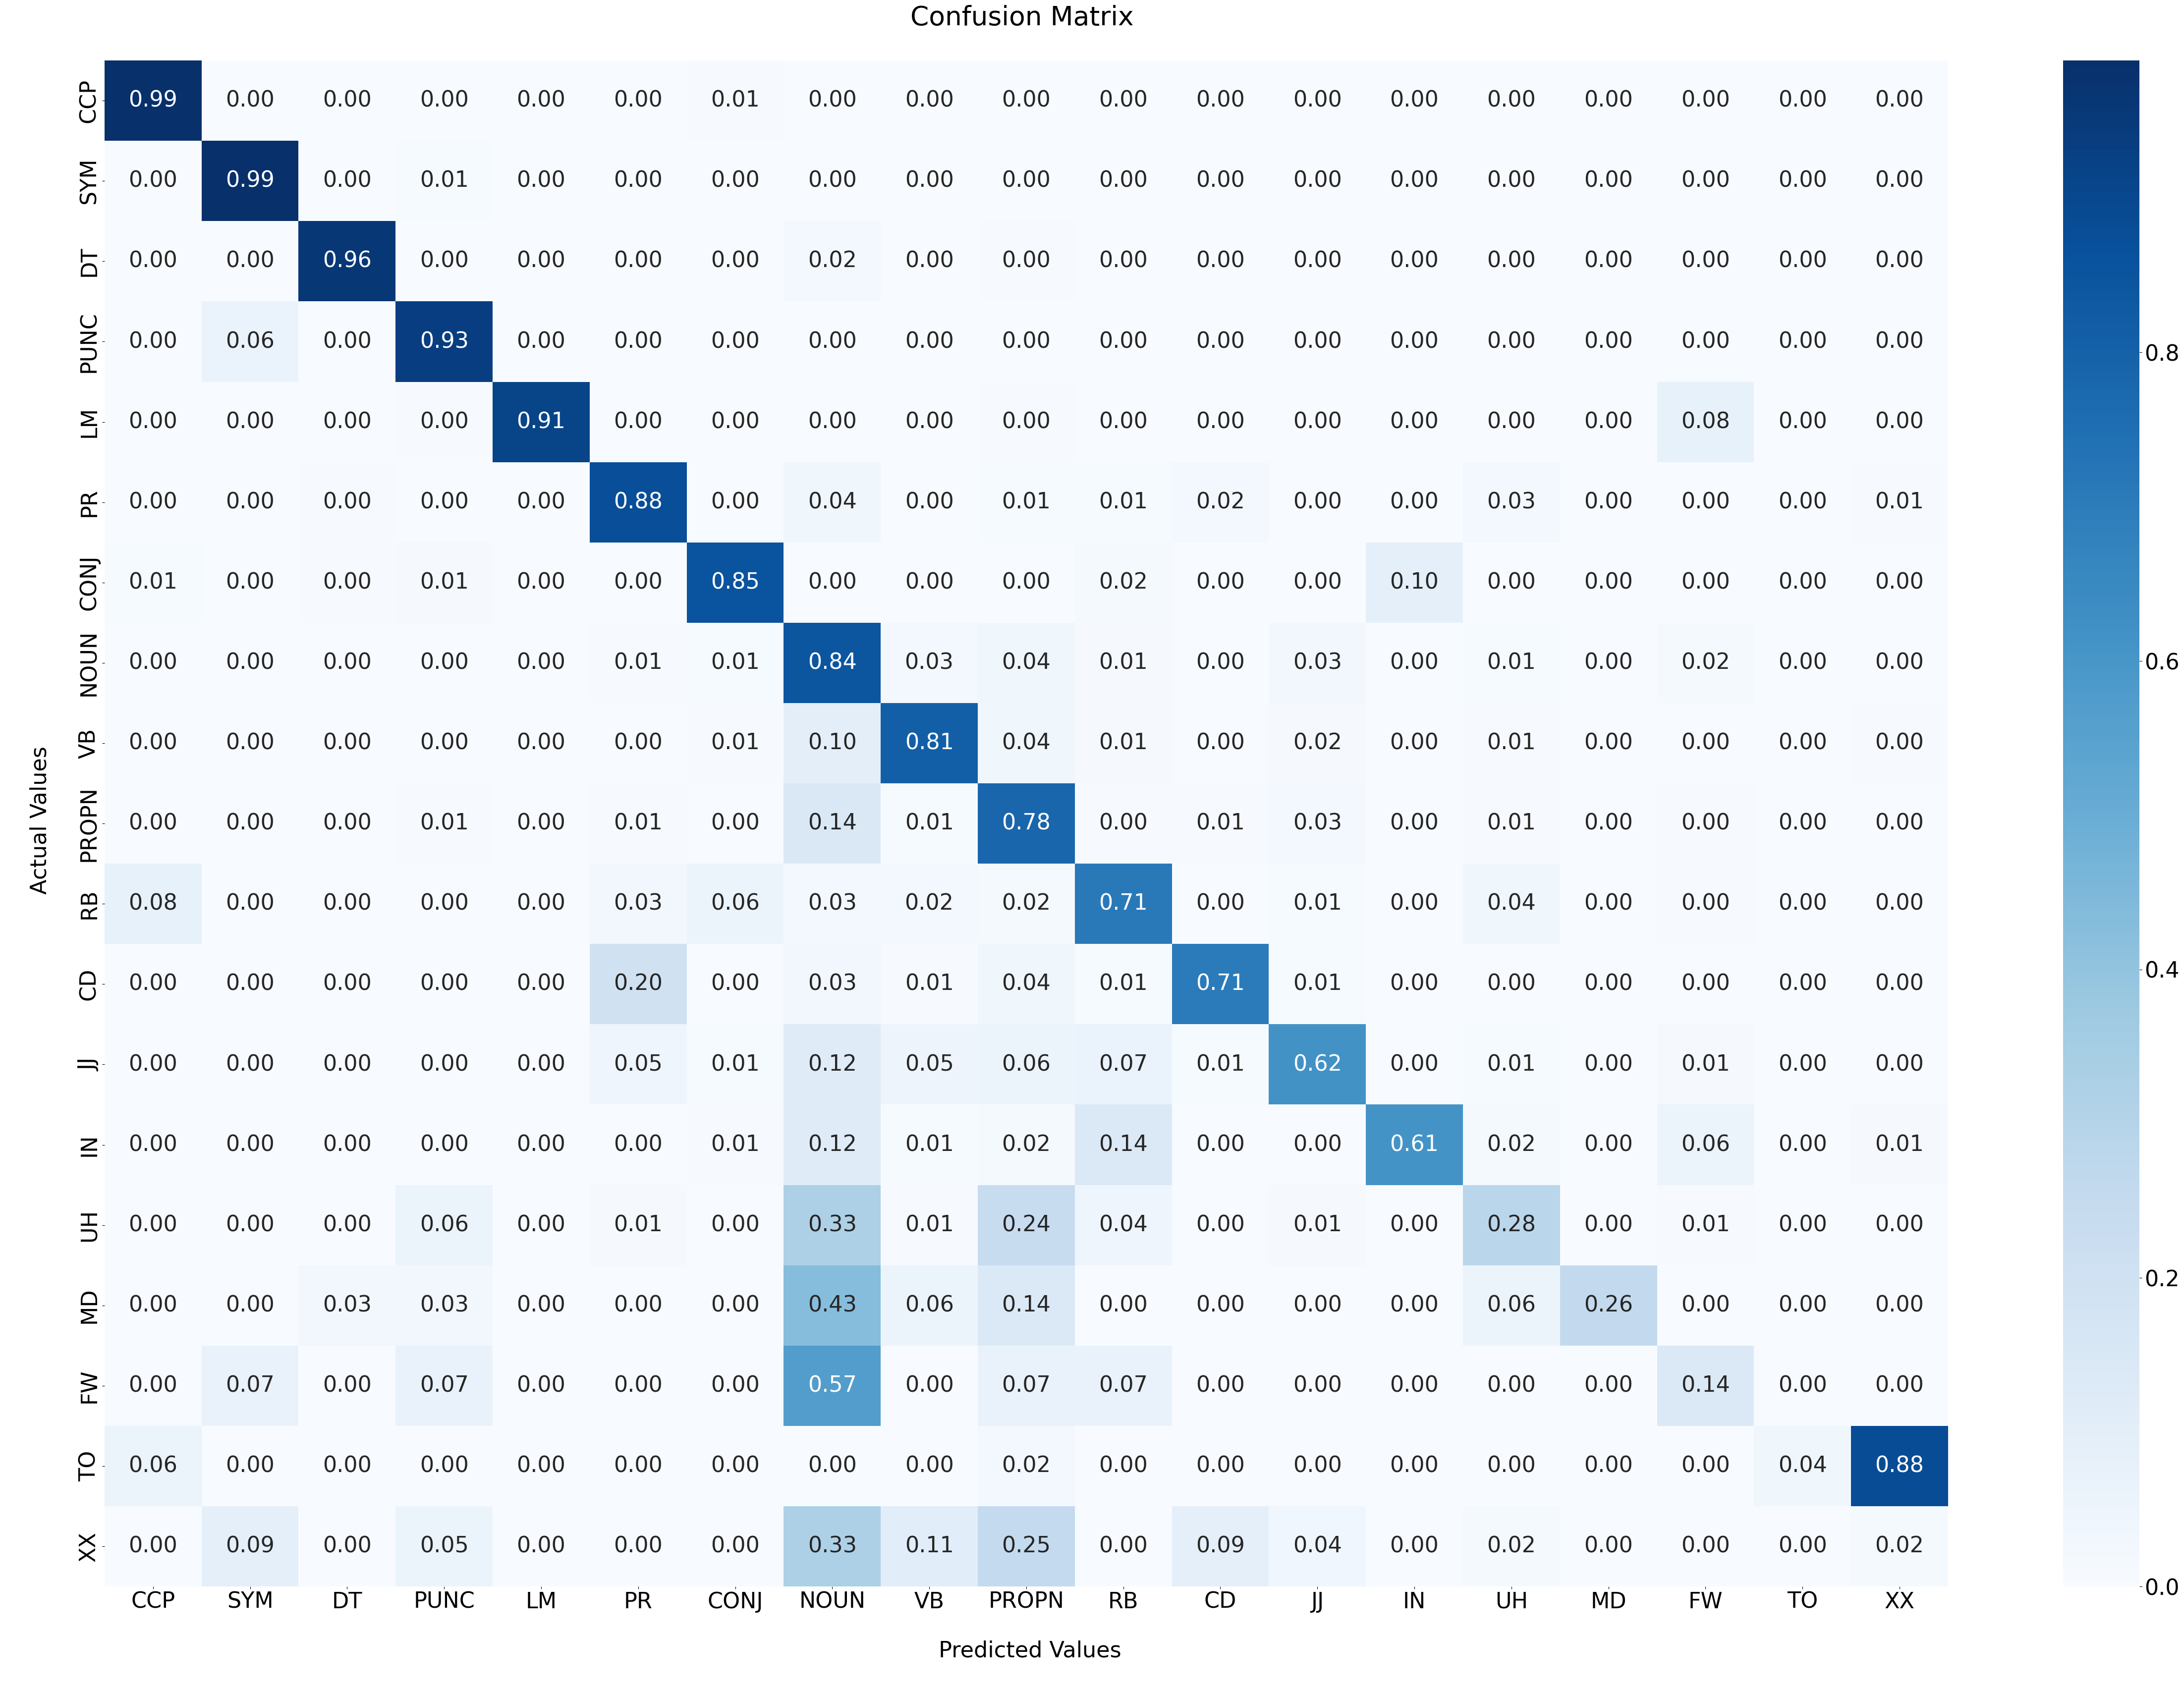

              precision    recall  f1-score   support

         ADD       0.00      0.00      0.00         0
         AFX       0.00      0.00      0.00         0
         CCP       0.77      0.99      0.87       928
          CD       0.82      0.71      0.76       683
        CONJ       0.93      0.85      0.89      4358
          DT       0.98      0.96      0.97      2500
          EX       0.00      0.00      0.00         3
          FW       0.01      0.14      0.02        14
          IN       0.30      0.61      0.40       306
          JJ       0.75      0.62      0.68      1558
          LM       0.99      0.91      0.95       243
          MD       0.64      0.26      0.37        35
        NOUN       0.77      0.84      0.80      4902
         POS       0.00      0.00      0.00        18
          PR       0.87      0.88      0.87      2745
       PROPN       0.74      0.78      0.76      2219
        PUNC       0.97      0.93      0.95      2995
          RB       0.85    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [24]:
generate_confusion_matrix(ff_combi1_output)

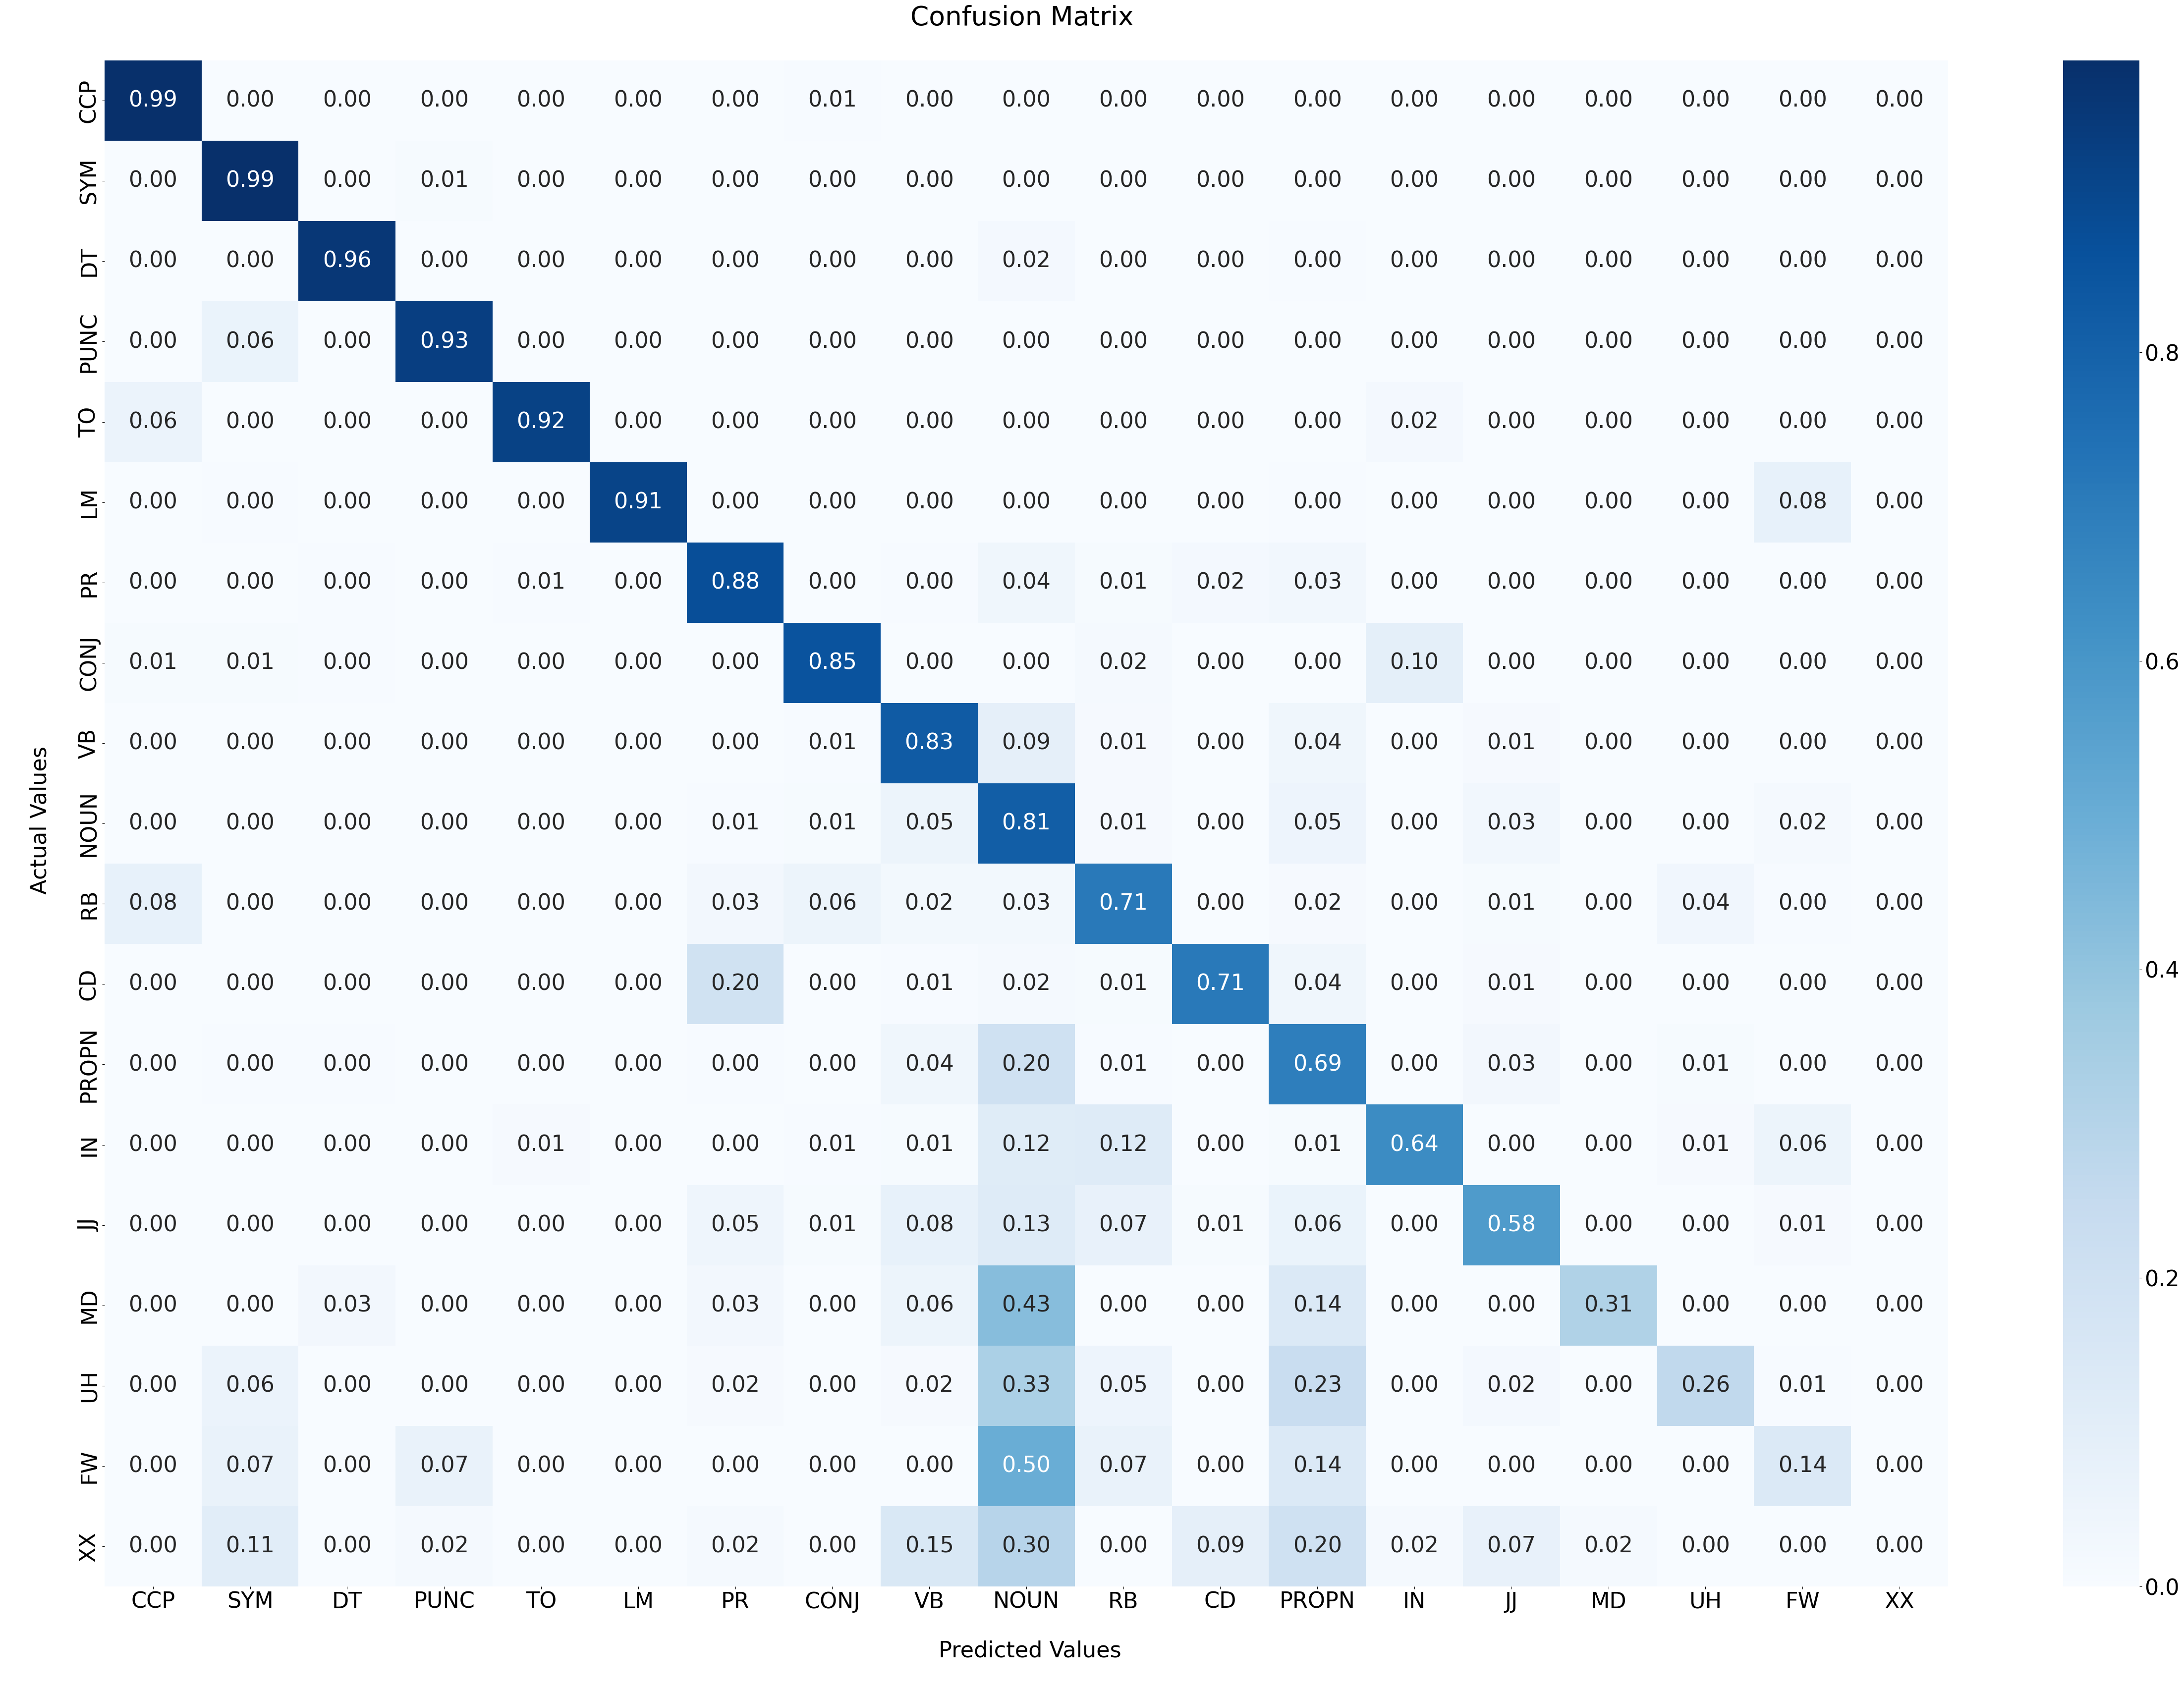

              precision    recall  f1-score   support

         ADD       0.00      0.00      0.00         0
         CCP       0.77      0.99      0.87       928
          CD       0.83      0.71      0.77       683
        CONJ       0.93      0.85      0.89      4358
          DT       0.98      0.96      0.97      2500
          EX       0.00      0.00      0.00         3
          FW       0.01      0.14      0.02        14
          IN       0.30      0.64      0.41       306
          JJ       0.74      0.58      0.65      1558
          LM       0.99      0.91      0.95       243
          MD       0.52      0.31      0.39        35
        NOUN       0.74      0.81      0.78      4902
         POS       0.00      0.00      0.00        18
          PR       0.87      0.88      0.87      2745
       PROPN       0.67      0.69      0.68      2219
        PUNC       0.99      0.93      0.96      2995
          RB       0.85      0.71      0.77      2943
         SYM       0.69    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [25]:
generate_confusion_matrix(sf_combi1_output)

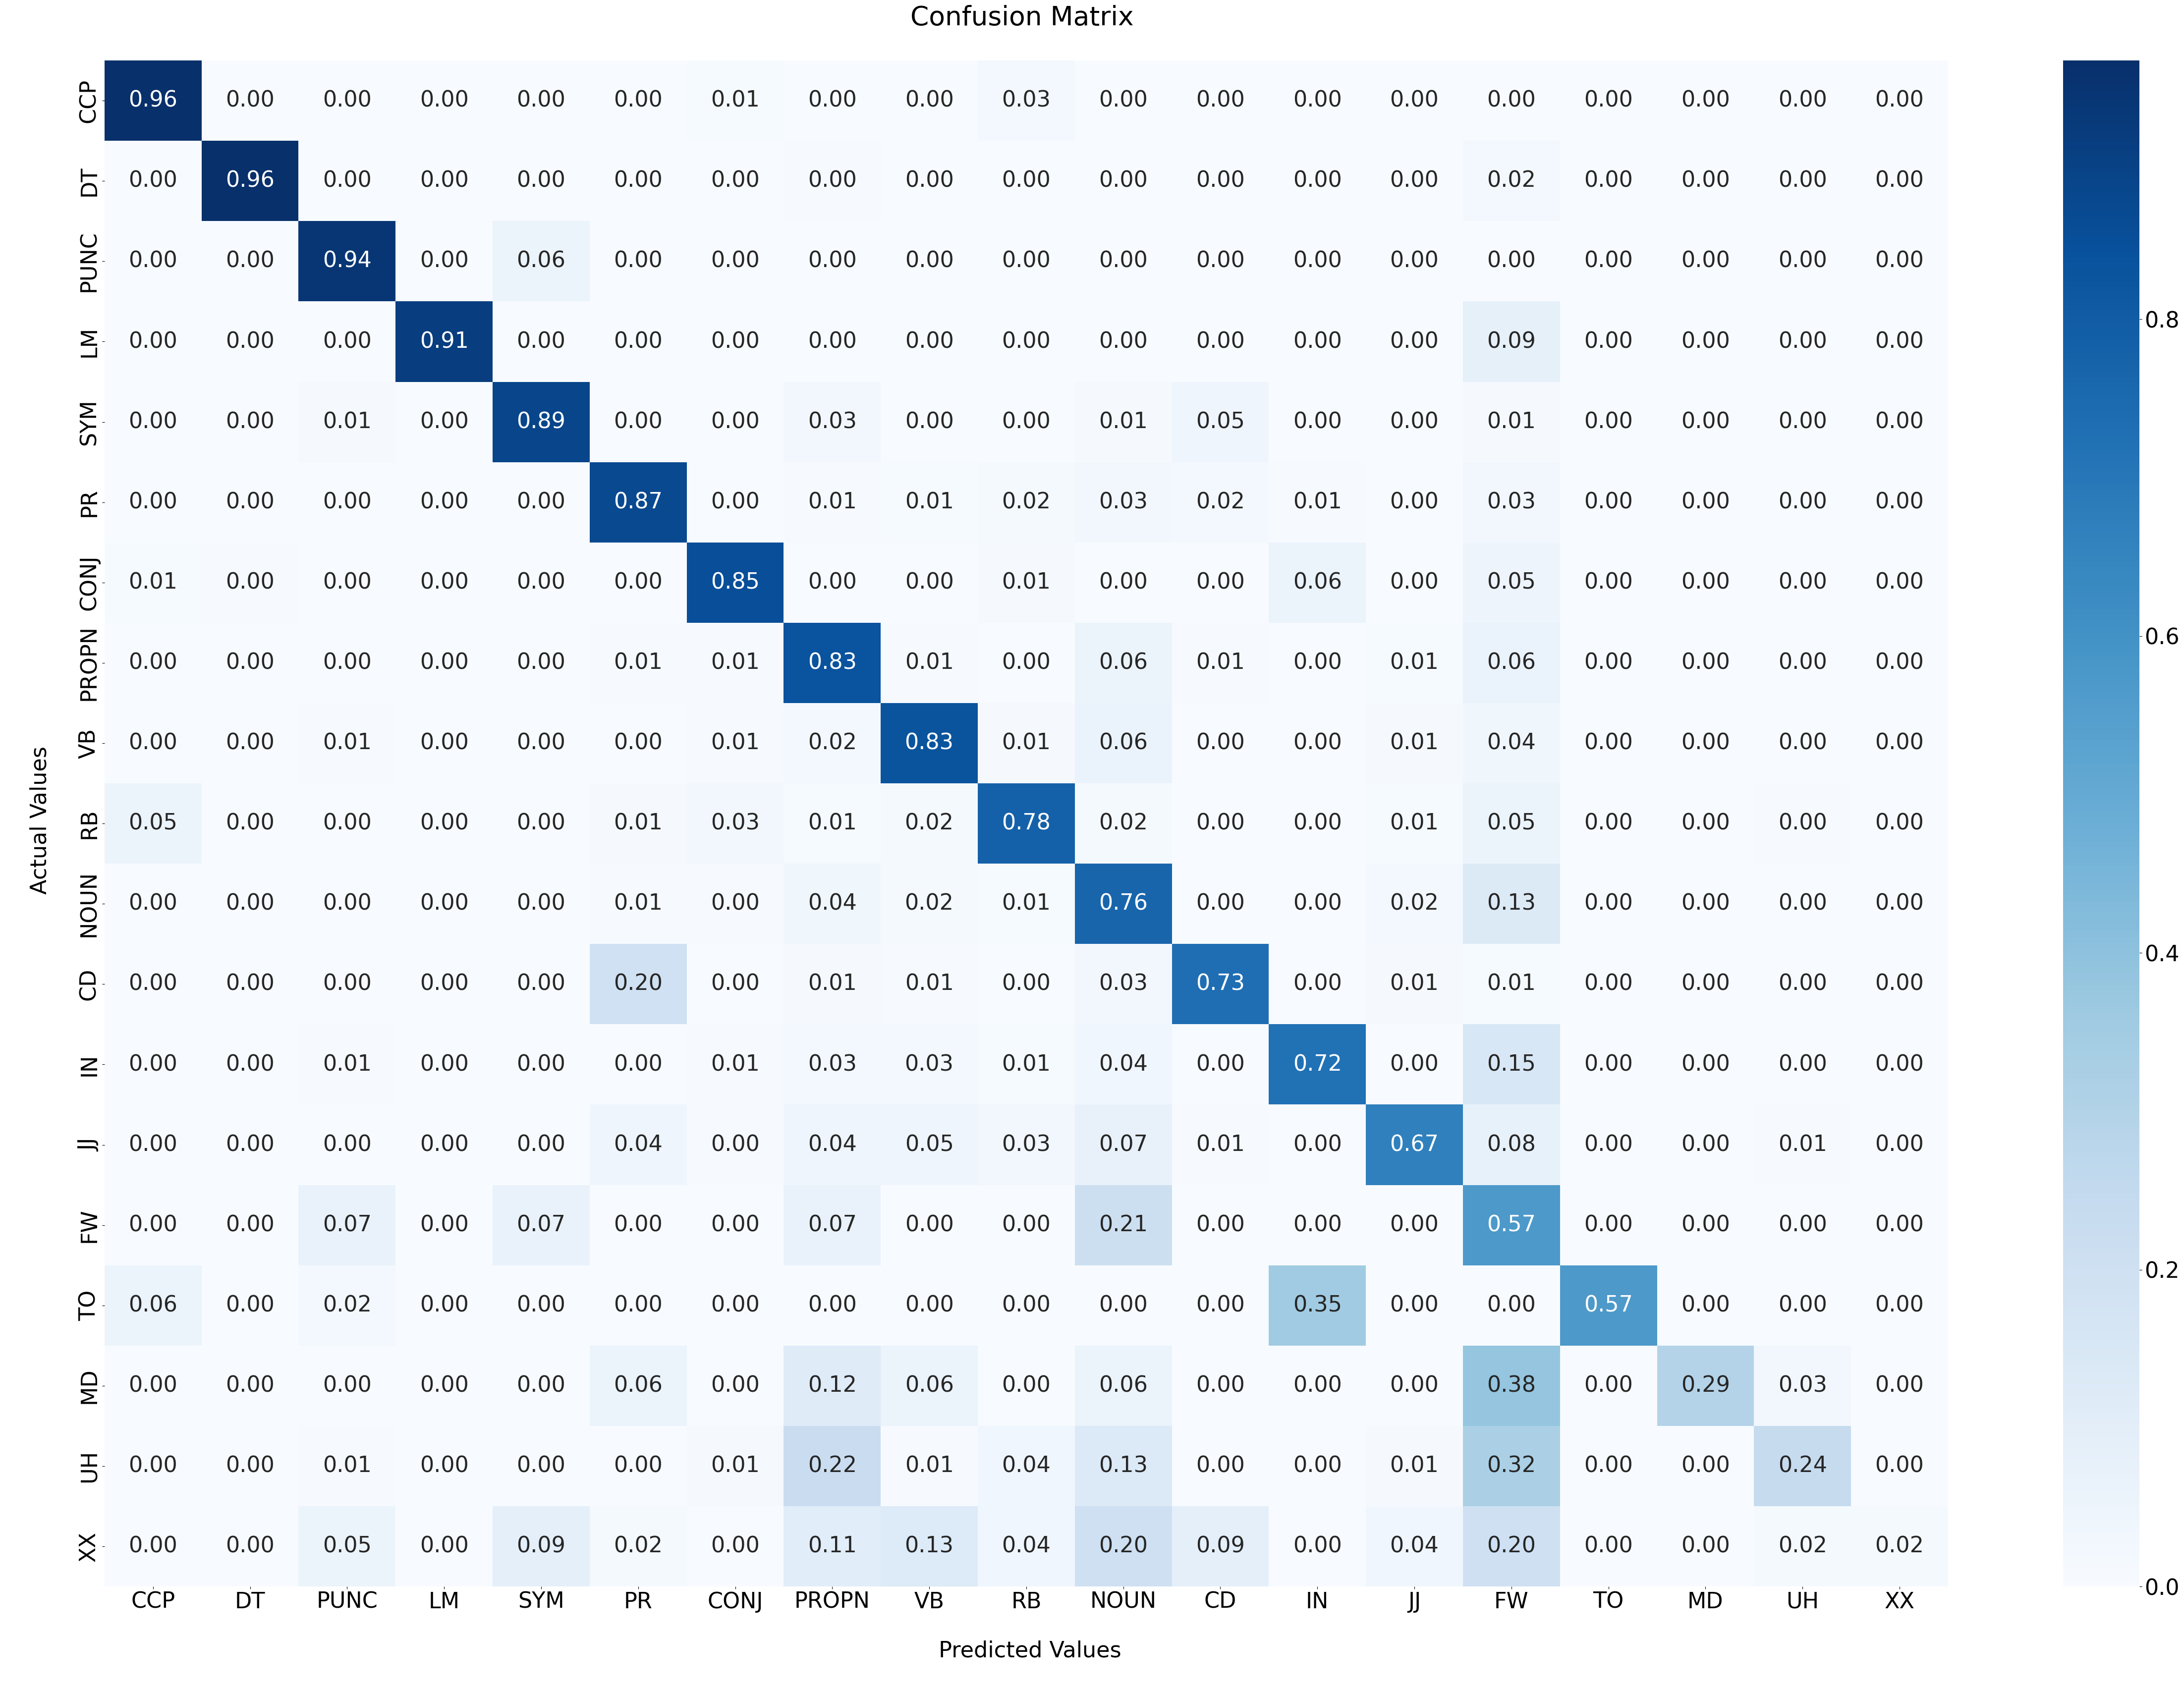

              precision    recall  f1-score   support

         CCP       0.82      0.96      0.88       928
          CD       0.78      0.73      0.75       683
        CONJ       0.95      0.85      0.90      4358
          DT       0.98      0.96      0.97      2500
          EX       1.00      0.67      0.80         3
          FW       0.00      0.57      0.01        14
          IN       0.41      0.72      0.53       306
          JJ       0.82      0.67      0.73      1558
          LM       0.99      0.91      0.95       243
          MD       0.53      0.29      0.37        35
        NOUN       0.85      0.76      0.80      4902
         PDT       0.00      0.00      0.00         0
         POS       0.67      0.56      0.61        18
          PR       0.88      0.87      0.88      2745
       PROPN       0.80      0.83      0.81      2219
        PUNC       0.98      0.94      0.96      2995
          RB       0.89      0.78      0.83      2943
         SYM       0.75    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [26]:
generate_confusion_matrix(ff_combi2_output)

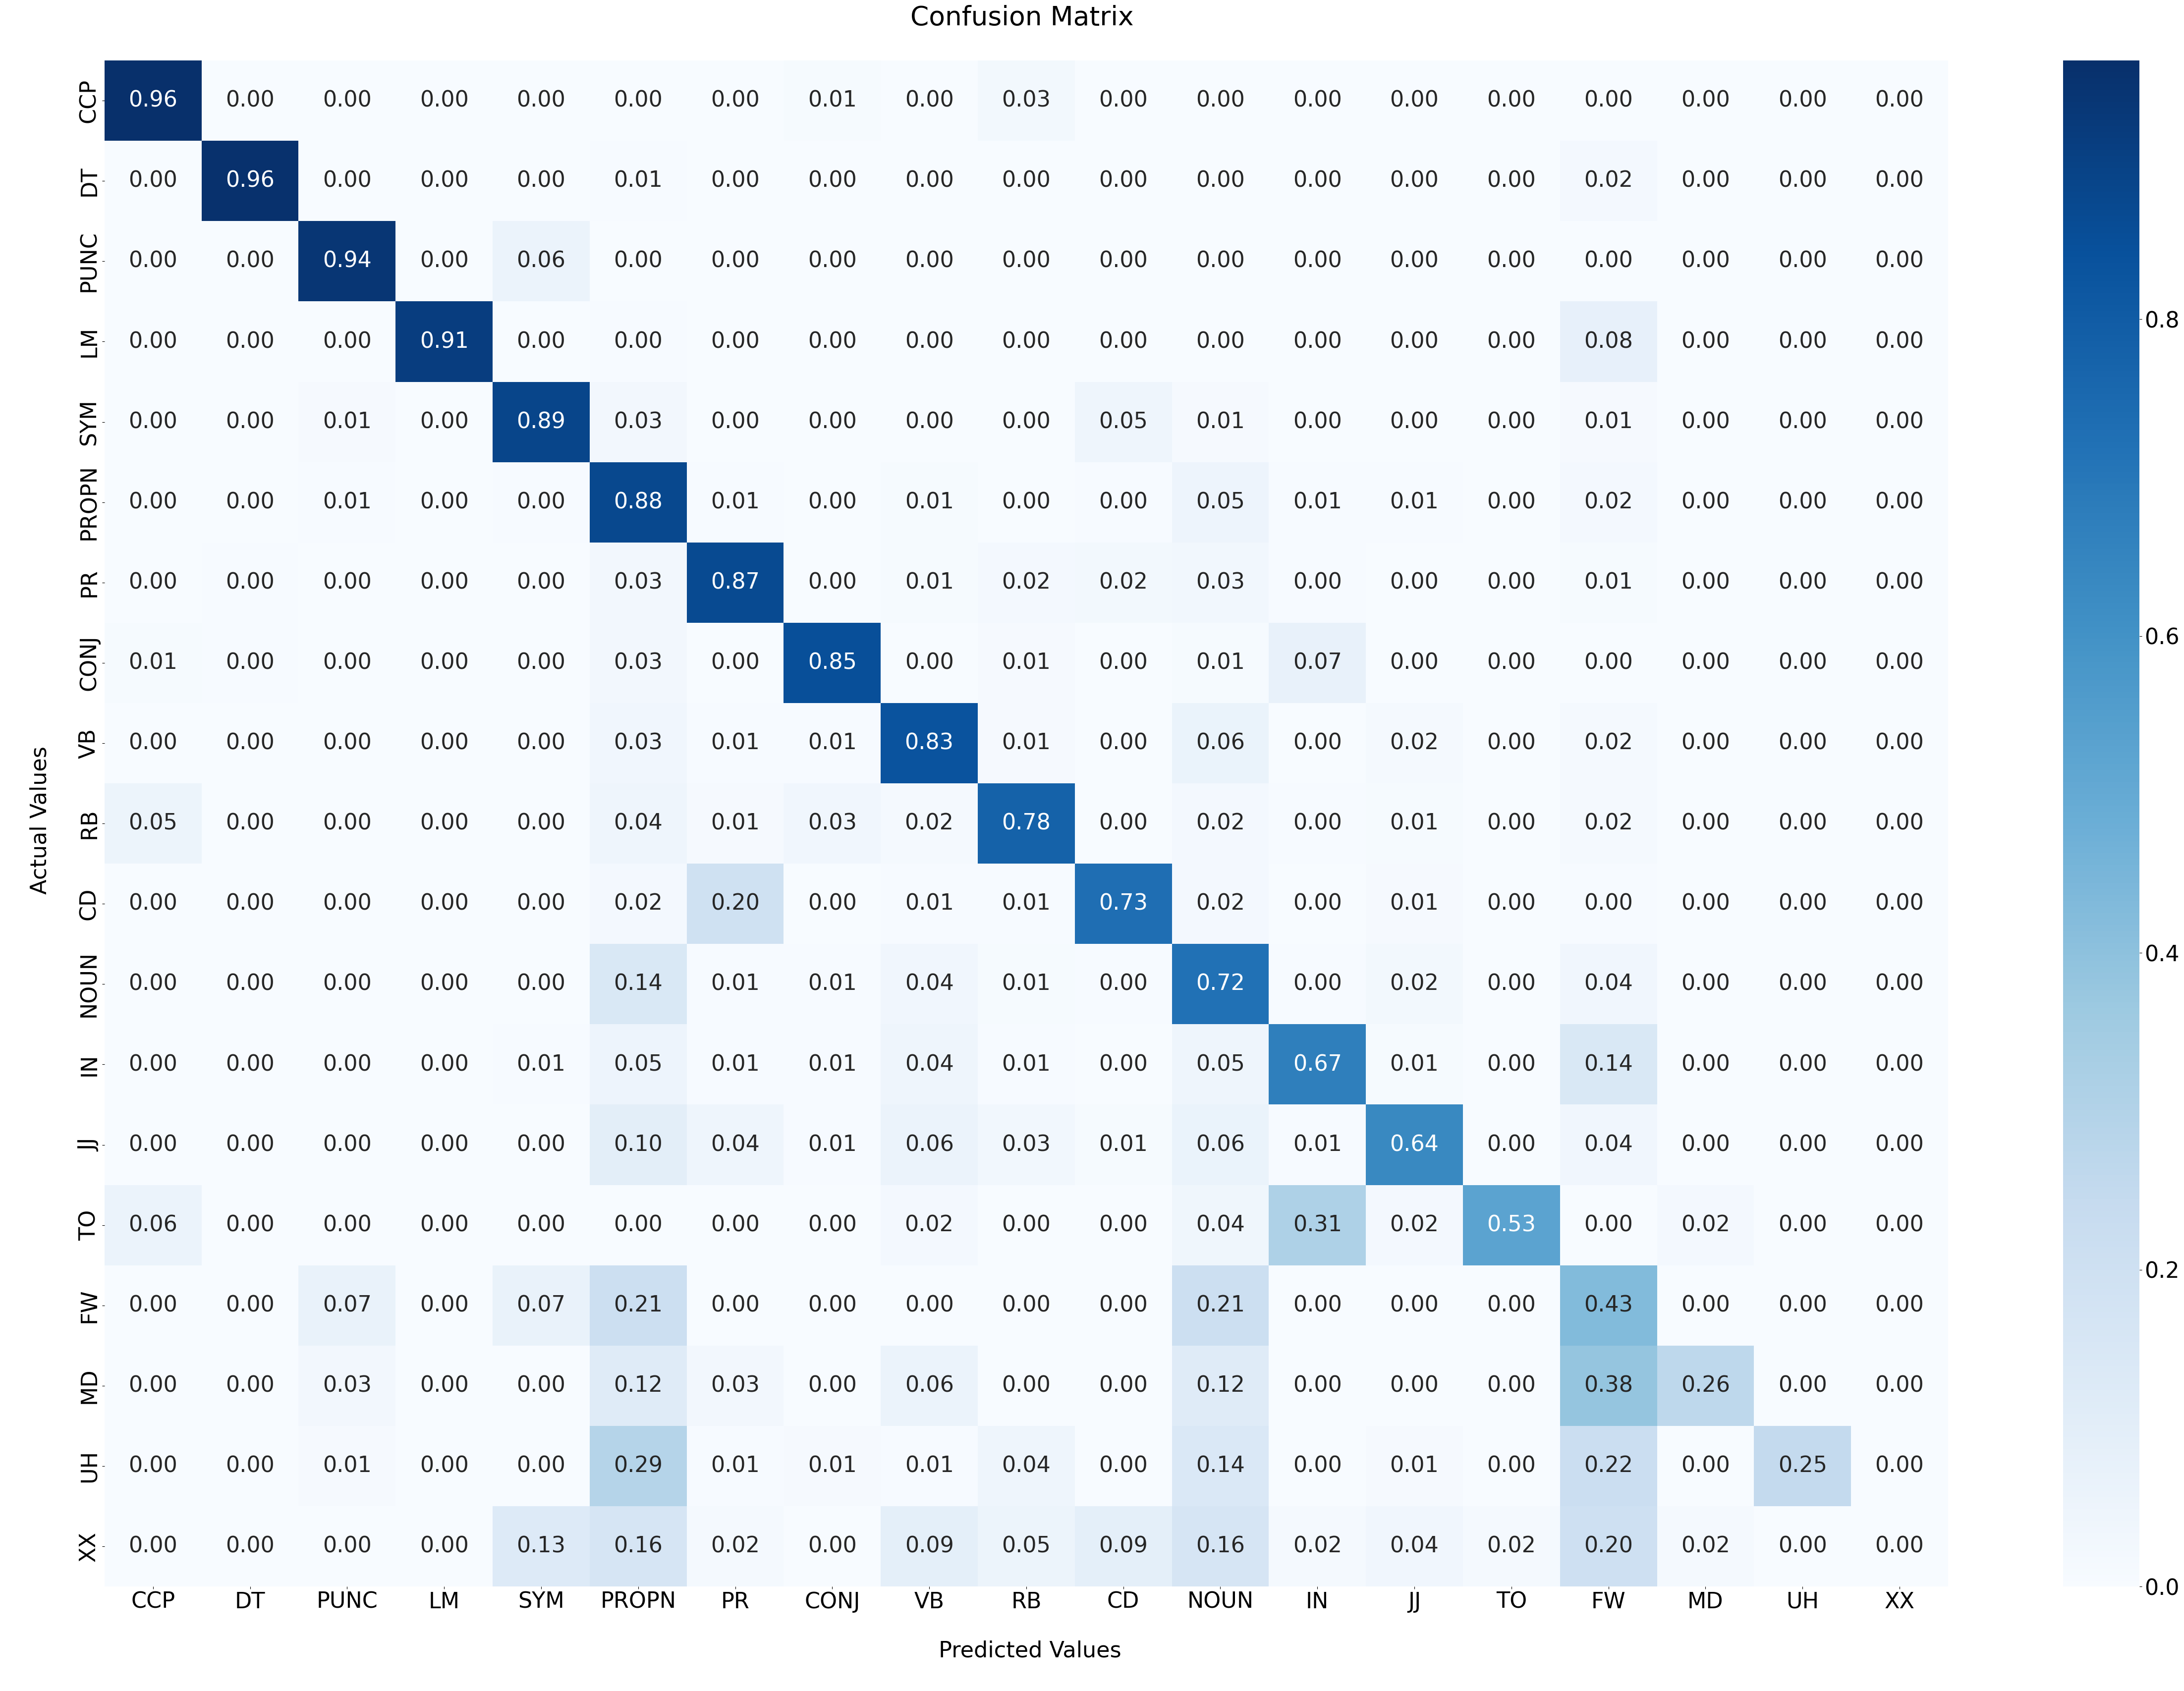

              precision    recall  f1-score   support

         CCP       0.82      0.96      0.88       928
          CD       0.77      0.73      0.75       683
        CONJ       0.95      0.85      0.90      4358
          DT       0.98      0.96      0.97      2500
          EX       0.67      0.67      0.67         3
          FW       0.01      0.43      0.02        14
          IN       0.33      0.67      0.44       306
          JJ       0.79      0.63      0.71      1558
          LM       0.99      0.91      0.95       243
          MD       0.32      0.26      0.29        35
        NOUN       0.84      0.72      0.77      4902
         PDT       0.00      0.00      0.00         0
         POS       0.59      0.72      0.65        18
          PR       0.88      0.87      0.87      2745
       PROPN       0.57      0.87      0.69      2219
        PUNC       0.98      0.94      0.96      2995
          RB       0.88      0.78      0.83      2943
         SYM       0.70    

c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian Jerez\Desktop\THESIS REPO\FIL-ENG-POST\project_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [27]:
generate_confusion_matrix(sf_combi2_output)